In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 18

@author: yaning
"""

import HH_original.HH_original as HH
import numpy as np
import matplotlib.pyplot as plt
import importlib

0


In [18]:
importlib.reload(HH)

0


<module 'HH_original.HH_original' from '/home/yaning/Documents/Spiking_NN/HH_original/HH_original.py'>

this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125


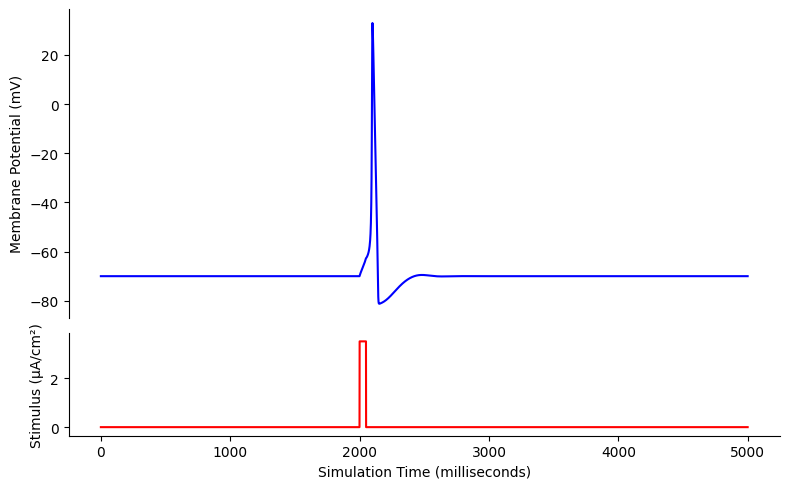

In [107]:
hh = HH.HHModel()
pointCount = 5000
voltages = np.empty(pointCount)
current = np.empty(pointCount)
# times = np.arange(pointCount) * 0.05
times = np.arange(pointCount)
stim = np.zeros(pointCount)
stim[2000:2050] = 3.5  # create a square pulse
# stim[2400:3020] = 5

for i in range(len(times)):
    hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
    
    voltages[i] = hh.Vm
    # note: you could also plot hh's n, m, and k (channel open states)
    current[i] = hh.I

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(times, voltages - 70, 'b')
# ax1.plot(times, current, 'b')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

ax2.plot(times, stim, 'r')
ax2.set_ylabel("Stimulus (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.margins(0, 0.1)
plt.tight_layout()
# plt.savefig("dev/concept4.png")
plt.show()

In [39]:
max(voltages-70)

np.float64(-64.01456866480534)

In [21]:
firing_times = []
for i in range(pointCount):
    if voltages[i] >= 20:
        firing_times.append(i)

In [108]:
fire_durations = []
for c in np.arange(2.5, 3.5, 0.001):
    hh = HH.HHModel()
    pointCount = 5000
    voltages = np.empty(pointCount)
    current = np.empty(pointCount)
    # times = np.arange(pointCount) * 0.05
    times = np.arange(pointCount)
    stim = np.zeros(pointCount)
    stim[2000:2050] = c  # create a square pulse
    # stim[2400:3020] = 5

    for i in range(len(times)):
        hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
        
        voltages[i] = hh.Vm
        # note: you could also plot hh's n, m, and k (channel open states)
        current[i] = hh.I
    
    num = 0
    for v in voltages:
        if v-70 >= -58:
            num += 1
    
    fire_durations.append(num)

this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.22356372458463003 4.0
this line runs
0.05819767068693265 0.125
this line runs
0.05819767068693265 0.125
this line runs
0.223563724584630

In [85]:
max_voltages = [v-70 for v in max_voltages]

In [87]:
below_zero = []
for i in max_voltages:
    if i <0:
        below_zero.append(i)

In [88]:
max(below_zero)

np.float64(-59.74699583858741)

In [111]:
non_zero = []
for i in fire_durations:
    if i != 0:
        non_zero.append(i)

In [109]:
max(non_zero)

69

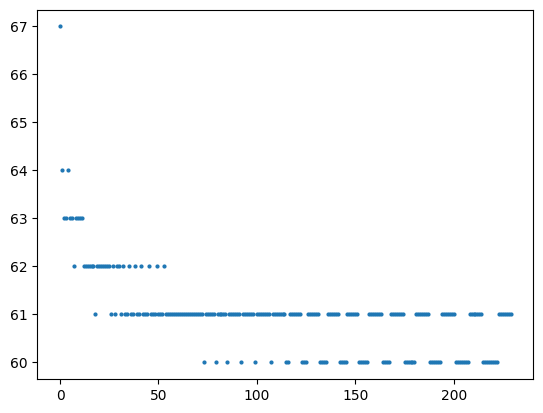

In [113]:
plt.plot(non_zero, 'o', markersize=2)
plt.savefig("plots/fire_duration_50.png", dpi=300)

In [22]:
firing_times

[2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2257,
 2258,
 2259,
 2260,
 2261,
 2262,
 2263,
 2264,
 2265,
 2266,
 2267,
 2268,
 2269,
 2270,
 2271,
 2272,
 2273,
 2274,
 2275,
 2276,
 2277,
 2278,
 2279,
 2280,
 2281,
 2282,
 2283,
 2284,
 2285,
 2286,
 2287,
 2288,
 2289,
 2290,
 2291,
 2292,
 2293,
 2294,
 2295,
 2296,
 2297,
 2298,
 2299,
 2300,
 2301,
 2302,
 2488,
 2489,
 2490,
 2491,
 2492,
 2493,
 2494,
 2495,
 2496,
 2497,
 2498,
 2499,
 2500,
 2501,
 2502,
 2503,
 2504,
 2505,
 2506,
 2507,
 2508,
 2509,
 2510,
 2511,
 2512,
 2513,
 2514,
 2515,
 2516,
 2517,
 2518,
 2519,
 2520,
 2521,
 2522,
 2523,
 2524,
 2525,
 2526,
 2527,
 2528,
 2529,
 2530,
 2531,
 2532,
 2533,